# Linear Regression with sklearn API

1. Dataset-California
2. Linear regression=> `LinearRegression`
3. Training: `fit` (normal equation) and `cross_validate` (normal equation with cross validation)
4. Evaluation: `score`(r2 score) and `cross_val_score` with different scoring parameters

Also study model diagnosis with LearningCurve and learn how to examine the learned model or weight vector.

In [ ]:
#@title Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
np.random.seed(306)
plt.style.use('seaborn')

In [ ]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

## **STEP-1**: Load the Dataset

In [ ]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

In [ ]:
features.shape

(20640, 8)

In [ ]:
labels.shape

(20640,)

In [ ]:
assert(features.shape[0]==labels.shape[0])

## **STEP:2** Data exploration
Already covered earlier

## **STEP-3** Preprocessing and model building

### 3.1 Train test split

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, random_state=42)

In [ ]:
print(train_features.shape[0])
print(test_features.shape[0])

15480
5160


### 3.2 Pipline: processing and model building

In [ ]:
lin_reg_pipeline = Pipeline([('feature_scaling', StandardScaler()),("lin_reg",LinearRegression())])

lin_reg_pipeline.fit(train_features,train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [ ]:
print("Intercept",lin_reg_pipeline[-1].intercept_)
print("wieghts",lin_reg_pipeline[-1].coef_)

Intercept 2.0703489205426377
wieghts [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


## **STEP-4:** Model Evaluation

### `score`

In [ ]:
test_score = lin_reg_pipeline.score(test_features, test_labels)
train_score = lin_reg_pipeline.score(train_features, train_labels)
print('test score',test_score)
print('train score',train_score)

test score 0.5910509795491352
train score 0.609873031052925


### Cross validated score(`cross_val_score`)

In [ ]:
lin_reg_score = cross_val_score(lin_reg_pipeline,
                                train_features,
                                train_labels,
                                scoring='neg_mean_squared_error',
                                cv=shuffle_split_cv)

print(lin_reg_score)

print(f"\n Score of linear regression model on the test set:\n"
      f"{lin_reg_score.mean():.3f} +/- {lin_reg_score.std():.3f}")

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

 Score of linear regression model on the test set:
-0.529 +/- 0.022


In [ ]:
lin_reg_mse = -lin_reg_score
lin_reg_mse.mean()

0.5287517875396764

###`cross_validate`

In [ ]:
lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    train_features,
                                    train_labels,
                                    cv=shuffle_split_cv,
                                    scoring="neg_mean_squared_error",
                                    return_train_score=True,
                                    return_estimator=True)

In [ ]:
lin_reg_cv_results

{'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]

In [ ]:
train_error = -1*lin_reg_cv_results['train_score']
test_error = -1*lin_reg_cv_results['test_score']
print(f"\n Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")
print(f"\n Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")


 Mean squared error of linear regression model on the test set:
0.529 +/- 0.022

 Mean squared error of linear regression model on the train set:
0.519 +/- 0.006


### Effect of training set size on error

In [ ]:
#@title [Plot learning Curve]
def plot_learning_curve(train_sizes, train_scores, test_scores):

  train_scores_mean = np.mean(-train_scores,axis=1)
  train_scores_std = np.std(-train_scores,axis=1)
  test_scores_mean = np.mean(-test_scores,axis=1)
  test_scores_std = np.std(-test_scores,axis=1)
  

  plt.fill_between(train_sizes,
                   train_scores_mean-train_scores_std,
                   train_scores_mean+train_scores_std,
                   alpha=0.1,
                   color="r",)
  plt.fill_between(train_sizes,
                   test_scores_mean-test_scores_std,
                   test_scores_mean+test_scores_std,
                   alpha=0.1,
                   color="g",)
  plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
  plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
  plt.xlabel("Training examples")
  plt.ylabel("MSE")
  plt.legend(loc="best")
def plot_scalability_curve(train_sizes, fit_times):
  fit_times_mean = np.mean(fit_times,axis=1)
  fit_times_std = np.std(fit_times,axis=1)
  plt.plot(
        train_sizes, fit_times_mean, "o-", color="r", label="Training score"
    )
  plt.xlabel("Training examples")
  plt.ylabel("Fit time")


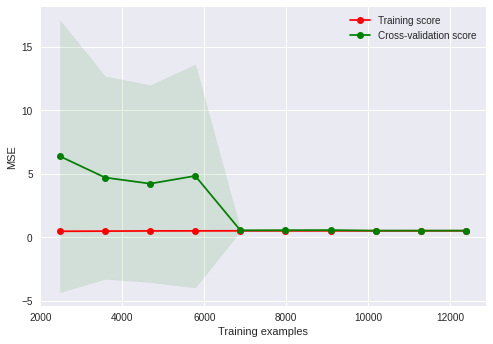

In [ ]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(lin_reg_pipeline,
                                                                                train_features,
                                                                                train_labels,
                                                                                cv=shuffle_split_cv,
                                                                                scoring='neg_mean_squared_error',
                                                                                n_jobs=-1,
                                                                                return_times=True,
                                                                                train_sizes=np.linspace(0.2,1.0,10))
plot_learning_curve(train_sizes,train_scores, test_scores)

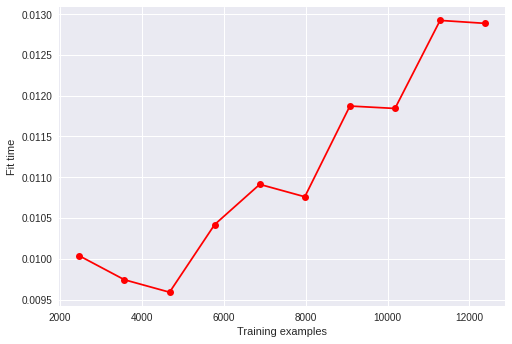

In [ ]:
plot_scalability_curve(train_sizes, fit_times)

### Model Examination

In [ ]:
feature_names = train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
#weights for different folds in shuffle split
coefs = [est[-1].coef_ for est in lin_reg_cv_results["estimator"]]
weights_df = pd.DataFrame(coefs, columns=feature_names)
weights_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.844325,0.118464,-0.304620,0.356621,0.000174,-0.042396,-0.896046,-0.868906
1,0.858714,0.122587,-0.318971,0.367952,-0.005787,-0.047584,-0.881884,-0.860932
2,0.861659,0.123953,-0.311375,0.364120,-0.002180,-0.042278,-0.883806,-0.857844
3,0.848127,0.126043,-0.311782,0.365767,-0.001925,-0.042371,-0.894694,-0.870356
4,0.851105,0.119741,-0.296175,0.344938,-0.005584,-0.026331,-0.906398,-0.879489
5,0.853378,0.128003,-0.302691,0.349465,0.001334,-0.027100,-0.884449,-0.858536
6,0.852045,0.120596,-0.306971,0.363658,-0.001946,-0.028373,-0.908058,-0.884206
7,0.853504,0.130560,-0.278426,0.307474,0.005297,-0.044352,-0.883704,-0.865643
8,0.843517,0.117394,-0.308985,0.364822,-0.002337,-0.027292,-0.902287,-0.877274
9,0.855156,0.120356,-0.303848,0.350465,-0.002805,-0.042516,-0.898783,-0.874346


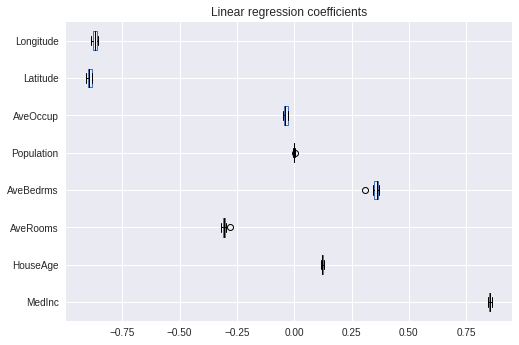

In [ ]:
color = {"whiskers":"black","medians":"black","caps":"black"}
weights_df.plot.box(color=color, vert=False)
_=plt.title("Linear regression coefficients")

Observation: There is not much variability in weights learned by different models. It can also described by standard deviation of weights as seen in `std` row below:

In [ ]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


### Selecting best model

Selection will be based on lowest cross validated test error as the best performing model

In [ ]:
best_model_index = np.argmin(test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

In [ ]:
print("Intercept (w_0):", selected_model['lin_reg'].intercept_)
print("coefficients(w_1,....w_m):", selected_model['lin_reg'].coef_)

Intercept (w_0): 2.0779898917958657
coefficients(w_1,....w_m): [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


### Model Performance

In [ ]:
from sklearn.model_selection import cross_val_predict
cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

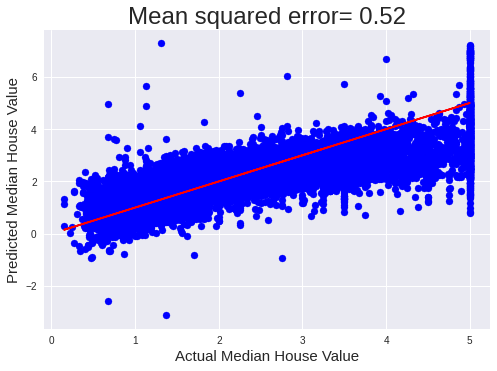

In [ ]:
mse_cv = mean_squared_error(train_labels, cv_predictions)

plt.scatter(train_labels, cv_predictions, color='blue')
plt.plot(train_labels, train_labels, 'r-')
plt.title(f"Mean squared error= {mse_cv:.2f}",size=24)
plt.ylabel('Predicted Median House Value', size=15)
plt.xlabel('Actual Median House Value', size=15)
plt.show()

- The model seems to all over the place in its predictions for examples with label 5.
- There are some negative predictions. We can fix this by adding a constraints on the weights to be positive.

## **STEP-5:** Predictions

In [ ]:
test_predictions_cv= selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

In [ ]:
test_predictions = lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

## STEP-6: Report Model Performance

In [ ]:
score_cv = selected_model.score(test_features,test_labels)
score = lin_reg_pipeline.score(test_features,test_labels)

print("R2 score for the best model obtained via cross validation:",score_cv)
print("R2 score for model without cv:", score)

R2 score for the best model obtained via cross validation: 0.5923577635319088
R2 score for model without cv: 0.5910509795491352


In [ ]:
mse = mean_squared_error(test_labels, test_predictions)
mse_cv =mean_squared_error(test_labels, test_predictions_cv)

print("MSE for the best model obtained via cross validation: ", mse_cv)
print("MSE for the  model obtained without cross validation: ", mse)

MSE for the best model obtained via cross validation:  0.5393995876218523
MSE for the  model obtained without cross validation:  0.5411287478470688


# Baseline models

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import permutation_test_score

In [ ]:
lin_reg_errors = pd.Series(-lin_reg_cv_results["test_score"], name="Linear regression error")

##`DummyRegressor`

In [ ]:
def dummy_regressor_baseline(strategy,constant_val=None, quantile_val=None):
  baseline_model_median = DummyRegressor(strategy=strategy,
                                         constant=constant_val,
                                         quantile=quantile_val)
  baseline_median_cv_results = cross_validate(baseline_model_median,
                                              train_features, train_labels,
                                              cv=shuffle_split_cv,
                                              scoring="neg_mean_absolute_error",
                                              n_jobs=2)
  return pd.Series(-baseline_median_cv_results["test_score"],
                   name="dummy regressor error")

In [ ]:
baseline_median_cv_results_errors = dummy_regressor_baseline(strategy='median')
baseline_mean_cv_results_errors = dummy_regressor_baseline(strategy='mean')
baseline_constant_cv_results_errors = dummy_regressor_baseline(strategy='constant',constant_val=2)
baseline_quantile_cv_results_errors = dummy_regressor_baseline(strategy='quantile',quantile_val=0.55)


In [ ]:
dummy_error_df = pd.concat([baseline_median_cv_results_errors,
                            baseline_mean_cv_results_errors,
                            baseline_constant_cv_results_errors,
                            baseline_quantile_cv_results_errors], axis=1)
dummy_error_df.columns = ['Median CV', 'Mean CV','Constant CV','Quantile CV']

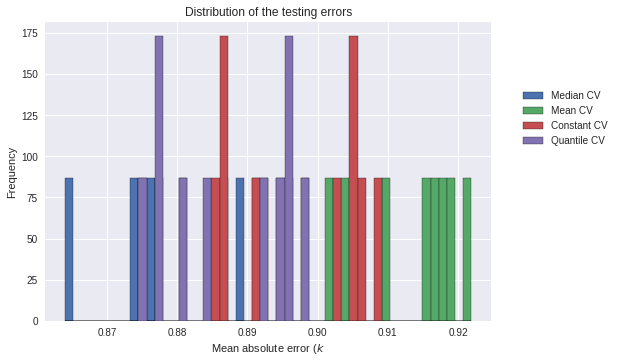

In [ ]:
dummy_error_df.plot.hist(bins=50, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05,0.8), loc="upper left")
plt.xlabel("Mean absolute error ($k$")
_=plt.title("Distribution of the testing errors")

## `permutation_test_score`

In [ ]:

score, permutation_score, pvalue = permutation_test_score(lin_reg_pipeline,
                                                          train_features, train_labels,
                                                          cv=shuffle_split_cv, scoring="neg_mean_absolute_error",
                                                          n_jobs=2, n_permutations=30)
permutation_errors = pd.Series(-permutation_score, name="Permuted error")

In [ ]:
print(permutation_score)

[-0.91446539 -0.91608713 -0.91501122 -0.91112203 -0.91326112 -0.91428719
 -0.91694297 -0.90660687 -0.90873595 -0.91546138 -0.9084695  -0.91174023
 -0.91857102 -0.91467076 -0.90396709 -0.91239289 -0.91095499 -0.91729623
 -0.90529415 -0.91436609 -0.91993036 -0.91661883 -0.91104746 -0.91563156
 -0.91014294 -0.91526135 -0.90680247 -0.90796435 -0.91032999 -0.91545574]


# Model Comparison

In [ ]:
error_df = pd.concat([lin_reg_errors, baseline_median_cv_results_errors, permutation_errors],axis=1)

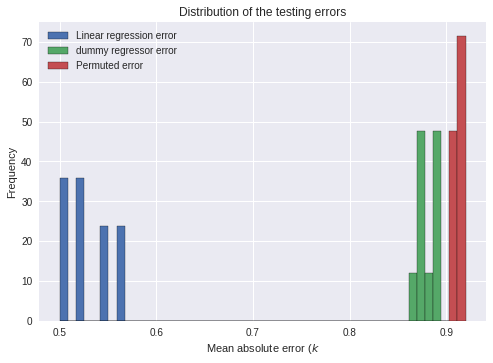

In [ ]:
error_df.plot.hist(bins=50, density=True, edgecolor="black")
plt.legend(loc="best")
plt.xlabel("Mean absolute error ($k$")
_=plt.title("Distribution of the testing errors")

# Linear Regression with `SGDRegressor`

In [1]:
#@title extra imports

from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import validation_curve

In [ ]:
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

In [ ]:
train_features, dev_features, train_labels, dev_labels =train_test_split(
    com_train_features, com_train_labels, random_state=42
)


## Baseline `SGDRegressor`
- Step-1: To begin with, we instantiate a baseline SGDRegressor model with default parameters.
- STEP-2: Train the model with training feature matrix and labels
- STEP-3: Obtain the score on the training and devel data

In [ ]:
sgd= SGDRegressor(random_state=42)
sgd.fit(train_features,train_labels)

train_mse = mean_absolute_error(train_labels, sgd.predict(train_features))
dev_mse = mean_absolute_error(dev_labels, sgd.predict(dev_features))
print("Mean absolute error on training set: ", train_mse)
print("Mean absolute error on development set: ", dev_mse)

Mean absolute error on training set:  312995824045833.75
Mean absolute error on development set:  315394681503071.94


Mean absolute error is too high, as the model isnot trained well. This may happen due to large learning rate.

## Add a feature Scaling Step
SGD is sensitive to feature scaling.

In [ ]:
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),("sgd",SGDRegressor())])
sgd_pipeline.fit(train_features, train_labels)

train_mse = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mse = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set: ", train_mse)
print("Mean absolute error on development set: ", dev_mse)

Mean absolute error on Training set:  0.5135804404077051
Mean absolute error on development set:  0.6373131245753217


## Stepwise training of `SGDRegressor`

- STEP-1: Instantiate `SGDRegressor` with the `warm_start=True` and `tol=-np.infinity`
- STEP-2: Train `SGD` step by step and record regression loss in each step
- STEP-3: Plot learning curves and see if there are nay issues in training

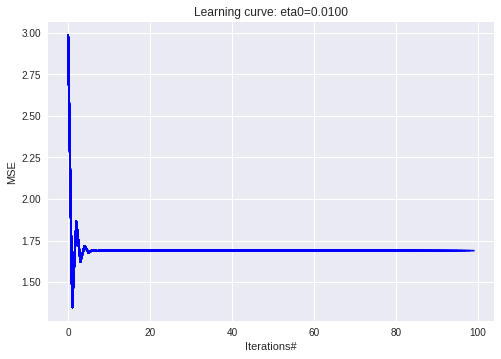

In [ ]:
eta0=1e-2
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),("SGD",SGDRegressor(max_iter=1, tol=-np.infty,
                                                                                   warm_start=True,
                                                                                   random_state=42))])
loss=[]
for epoch in range(100):
  sgd_pipeline.fit(train_features, train_labels) #continue where it is left off
  loss.append(mean_squared_error(train_labels,
                                 sgd_pipeline.predict(train_features)))
  plt.plot(np.arange(len(loss)),loss,'b-')
  plt.xlabel('Iterations#')
  plt.ylabel('MSE')
  plt.title(f'Learning curve: eta0={eta0:.4f}')

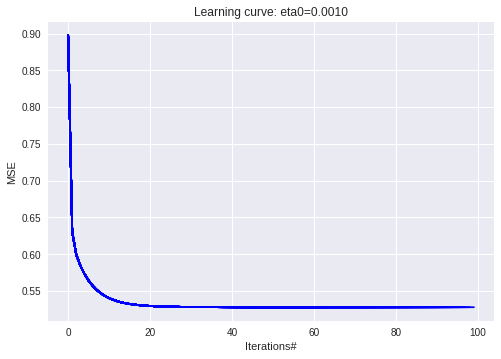

In [ ]:
eta0=1e-3
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),("SGD",SGDRegressor(max_iter=1, tol=-np.infty,
                                                                                   warm_start=True,
                                                                                   eta0=eta0,
                                                                                   random_state=42))])
loss=[]
for epoch in range(100):
  sgd_pipeline.fit(train_features, train_labels) #continue where it is left off
  loss.append(mean_squared_error(train_labels,
                                 sgd_pipeline.predict(train_features)))
  plt.plot(np.arange(len(loss)),loss,'b-')
  plt.xlabel('Iterations#')
  plt.ylabel('MSE')
  plt.title(f'Learning curve: eta0={eta0:.4f}')

In [ ]:
print("#Iterations before reacing convergence criteria:",sgd_pipeline[-1].n_iter_)
print("Weight updates:",sgd_pipeline[-1].t_)

#Iterations before reacing convergence criteria: 1
Weight updates: 11611.0


In [ ]:
train_mse = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mse = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set: ", train_mse)
print("Mean absolute error on development set: ", dev_mse)

Mean absolute error on Training set:  0.5333732983042573
Mean absolute error on development set:  0.5190150280908042


## Fixing Learning rate through validation curves
- STEP-1: Provide list of values to be tried for a hyper-parameter
- STEP-3: Instantiate an object of `validation_curve` with estimator, training features and label. Set `scoring` parameter to relevant score.
- STEP-3: Convert scores to error
-STEP-4: Plot validation curve with the value of hyper-parameter on x-axis and error on the y-sxis.
- STEP-5: Fix the hyper-parameter value where the test error is the least.

In [ ]:
%%time
eta0 = [1e-5,1e-4,1e-3,1e-2]
train_scores, test_scores = validation_curve(
    sgd_pipeline, com_train_features, com_train_labels, param_name="SGD__eta0",
    param_range=eta0, cv=shuffle_split_cv, scoring="neg_mean_squared_error",
    n_jobs=2
)
train_errors, test_errors = -train_scores, -test_scores

CPU times: user 286 ms, sys: 23.8 ms, total: 310 ms
Wall time: 1.26 s


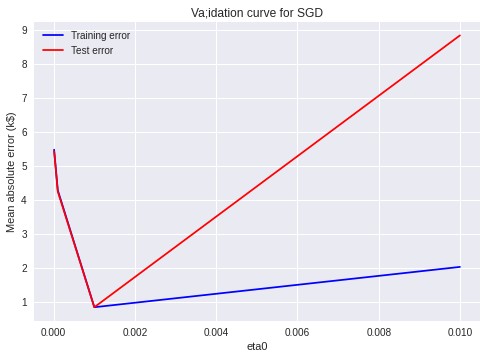

In [ ]:
plt.plot(eta0, train_errors.mean(axis=1),'b-x',label="Training error")
plt.plot(eta0, test_errors.mean(axis=1),'r-x',label="Test error")
plt.legend()
plt.xlabel("eta0")
plt.ylabel("Mean absolute error (k$)")
_=plt.title("Va;idation curve for SGD")

for eta0=1e-3, the test error is the least and hence we select that value as the value for eta0

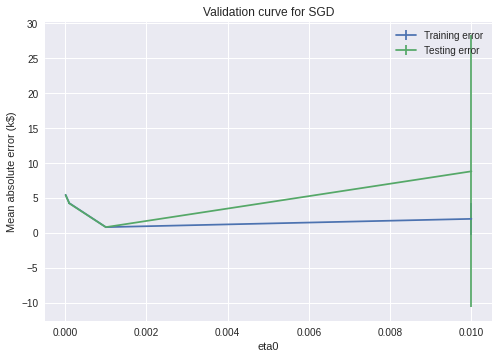

In [ ]:
plt.errorbar(eta0, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1),
             label='Training error')
plt.errorbar(eta0, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1),
             label='Testing error')
plt.legend()
plt.xlabel("eta0")
plt.ylabel("Mean absolute error (k$)")
_=plt.title("Validation curve for SGD")

## `SGDRegrssor`

In [ ]:
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                         ("SGD",SGDRegressor(max_iter=500, 
                                             early_stopping=True,
                                             eta0=1e-3,
                                             tol=1e-3,
                                validation_fraction=0.2,
                                n_iter_no_change=5,
                                average=10,
                                random_state=42))])
sgd_pipeline.fit(train_features,train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set: ", train_mae)
print("Mean absolute error on development set: ", dev_mae)

Mean absolute error on Training set:  0.579376454514559
Mean absolute error on development set:  0.5689180241137523


In [ ]:
print("#No. of SGD Iterations:",sgd_pipeline[-1].n_iter_)
print("Weight updates:",sgd_pipeline[-1].t_)

#No. of SGD Iterations: 7
Weight updates: 81271.0


In [ ]:
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                         ("SGD",SGDRegressor(max_iter=500, 
                                             early_stopping=True,
                                             eta0=1e-3,
                                             tol=1e-3,
                                             learning_rate='constant',
                                validation_fraction=0.2,
                                n_iter_no_change=5,
                                average=10,
                                random_state=42))])
sgd_pipeline.fit(train_features,train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set: ", train_mae)
print("Mean absolute error on development set: ", dev_mae)

Mean absolute error on Training set:  0.5359339681114987
Mean absolute error on development set:  0.5151099728924144


In [ ]:
print("#No. of SGD Iterations:",sgd_pipeline[-1].n_iter_)
print("Weight updates:",sgd_pipeline[-1].t_)

#No. of SGD Iterations: 8
Weight updates: 92881.0


In [ ]:
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                         ("SGD",SGDRegressor(max_iter=500, 
                                             early_stopping=True,
                                             eta0=1e-3,
                                             tol=1e-3,
                                             learning_rate='adaptive',
                                validation_fraction=0.2,
                                n_iter_no_change=5,
                                average=10,
                                random_state=42))])
sgd_pipeline.fit(train_features,train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set: ", train_mae)
print("Mean absolute error on development set: ", dev_mae)

Mean absolute error on Training set:  0.5340193046836148
Mean absolute error on development set:  0.5198356196858102


In [ ]:
print("#No. of SGD Iterations:",sgd_pipeline[-1].n_iter_)
print("Weight updates:",sgd_pipeline[-1].t_)

#No. of SGD Iterations: 33
Weight updates: 383131.0


## Setting `max_iters`

In [ ]:
max_iter = np.ceil(1e6/com_train_features.shape[0])
max_iter

65.0

In [ ]:
sgd_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                         ("SGD",SGDRegressor(max_iter=max_iter, 
                                             early_stopping=True,
                                             eta0=1e-3,
                                             tol=1e-3,
                                             learning_rate='adaptive',
                                validation_fraction=0.2,
                                n_iter_no_change=5,
                                average=10,
                                random_state=42))])
sgd_pipeline.fit(train_features,train_labels)

train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set: ", train_mae)
print("Mean absolute error on development set: ", dev_mae)
print("#No. of SGD Iterations:",sgd_pipeline[-1].n_iter_)
print("Weight updates:",sgd_pipeline[-1].t_)

Mean absolute error on Training set:  0.5340193046836148
Mean absolute error on development set:  0.5198356196858102
#No. of SGD Iterations: 33
Weight updates: 383131.0
